In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/MyDrive/DSFP_data/Bachelor analysis.csv')

data

,Name,Age,Hometown,Job category,Race,Place,Season,1-on-1 week,FIR?,Joke Entrance
0,DeAnna Pappas,25,South,REALTOR,White,2,11,NaN,NaN,NaN
1,Jenni Croft,27,Midwest,DANCER,White,2,11,NaN,Yes,NaN
2,Bettina Bell[2],27,Mid atlantic,REALTOR,White,3,11,NaN,NaN,NaN
3,Sheena Stewart[3],23,West,EXECUTIVE,White,4,11,NaN,NaN,NaN
4,Hillary Reisinger[4],27,Mid atlantic,MEDICAL,White,5,11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
417,Casandra Suarez[45],25,West,POLITICS,Hispanic,25,25,NaN,NaN,NaN
418,Corrinne Jones[48],22,East,MARKETING,White,25,25,NaN,NaN,NaN
419,Emani Curl[49],25,West,REALTOR,Black,25,25,NaN,NaN,NaN
420,Kimberly Courneya[28],28,Northwest,RECRUITER,Black,25,25,NaN,NaN,NaN


In [ ]:
data_clean = data.copy()
for col in ["Hometown", "Job category", "Race", "Joke Entrance"]:
  # print( {name:i for i, name in enumerate(data[col].unique())} )
  data_clean = data_clean.replace( {name:i for i, name in enumerate(data[col].unique())} )

data_clean['FIR'] = np.where( data_clean['FIR?'] == 'Yes' , 1 , 0)

data_clean = data_clean.drop(columns=['Name','FIR?', 'Joke Entrance'])

new_job_cat = {
    'POLITICS':['NEWS', 'MILLITARY', 'POLITICS'],
    'CORPORATE':['MARKETING', 'PR', 'RECRUITER', 'ASSISTANT', 'EXECUTIVE', 'SALES', 'FINANCE'],
    'TRADES':['RESTAURANT JOB', 'WAITRESS', 'BEAUTY', 'ACTRESS/MODEL', 'DANCER', 'REALTOR', 'EVENT PLANNER', 'FITNESS', 'NANNY'],
    'TRADITIONAL':['TEACHER','DENTIST', 'LAWYER', 'MEDICAL', 'SCIENCE/TECHNOLOGY'],
    'OTHER':['STUDENTT', 'STUDENT', 'WRITER', 'PASTOR', 'ART', 'NONE', 'JOKE', 'FLIGHT ATTENDANT'],
}

job_categories = data['Job category'].to_numpy()
new_job_categories = []
for name in job_categories:
  for key, val in new_job_cat.items():
    if name in val:
      new_name = key
  new_job_categories.append( new_name )

data_clean['Job category'] = np.array(new_job_categories)


new_hometown_cat = {
    'INTERNATIONAL':['Canada','International'],
    'NE':['Midwestt','East','Midwest','Mid atlantic'],
    'NW':['West','Northwest'],
    'SE':['South',],
    'SW':['Southwest']
}
home_categories = data['Hometown'].to_numpy()
new_home_categories = []
for name in home_categories:
  for key, val in new_hometown_cat.items():
    if name in val:
      new_name = key
  new_home_categories.append( new_name )

data_clean['Hometown'] = np.array(new_home_categories)


one_hot_dfs = [data_clean]
col_name_one_hot = ['Hometown', 'Race', 'Job category']

for name in col_name_one_hot:
  num_un = data_clean[name].nunique()
  one_hot = pd.get_dummies( data_clean[name] )
  one_hot.rename( columns={i:name+f'_{i}' for i in range(num_un)}, inplace=True)
  one_hot_dfs.append( one_hot )


combined_df = pd.concat( one_hot_dfs, axis=1 )
combined_df = combined_df.drop(columns=['Hometown','Job category', 'Race'])

combined_df

,Age,Place,Season,1-on-1 week,FIR,INTERNATIONAL,NE,NW,SE,SW,Race_0,Race_1,Race_2,Race_3,Race_4,CORPORATE,OTHER,POLITICS,TRADES,TRADITIONAL
0,25,2,11,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,27,2,11,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,27,3,11,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,23,4,11,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,27,5,11,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,25,25,25,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
418,22,25,25,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
419,25,25,25,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
420,28,25,25,0.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


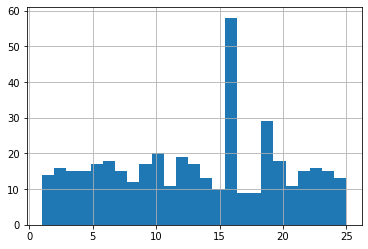

In [ ]:
combined_df.Place.hist(bins=25)

In [ ]:
# combined_df.drop(columns=['Season '], inplace=True)

16    58
19    29
10    20
12    19
6     18
Name: Place, dtype: int64
16    29
19    29
10    20
12    19
6     18
Name: Place, dtype: int64


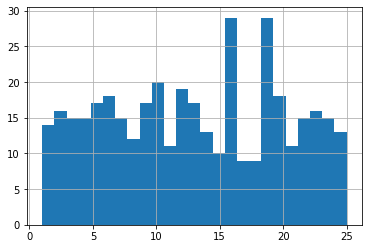

In [ ]:
print( combined_df.Place.value_counts().head() )

# Place 16 is over represented in the data set, lets try and reduce this to a 28 (compared to 58)

locs_to_remove = np.random.choice(np.where(combined_df.Place == 16)[0], size=37)

combined_df.drop(index=locs_to_remove, inplace=True)

print( combined_df.Place.value_counts().head() )

combined_df.Place.hist(bins=25)

In [ ]:
# all possible combinations to see which combo is best
determine = pd.DataFrame(index=pd.MultiIndex.from_product([combined_df[col].unique() for col in combined_df.columns.drop(['Place', 'Season '])], 
                                                          names=combined_df.columns.drop(['Place', 'Season ']))).reset_index()

determine

,Age,1-on-1 week,FIR,INTERNATIONAL,NE,NW,SE,SW,Race_0,Race_1,Race_2,Race_3,Race_4,CORPORATE,OTHER,POLITICS,TRADES,TRADITIONAL
0,25,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,25,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
2,25,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,25,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,25,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7340027,21,5.0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0,1
7340028,21,5.0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0
7340029,21,5.0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1
7340030,21,5.0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0


In [ ]:
input_names = list(combined_df.columns)
input_names.remove('Place')

input_names

['Age',
 'Season ',
 '1-on-1 week',
 'FIR',
 'INTERNATIONAL',
 'NE',
 'NW',
 'SE',
 'SW',
 'Race_0',
 'Race_1',
 'Race_2',
 'Race_3',
 'Race_4',
 'CORPORATE',
 'OTHER',
 'POLITICS',
 'TRADES',
 'TRADITIONAL']

In [ ]:
import torch

labels = combined_df['Place'].to_numpy()

inputs = combined_df[input_names].to_numpy()

labels = torch.tensor( labels )
inputs = torch.tensor( inputs )

In [ ]:
len(np.unique(labels.numpy()))

25

In [ ]:
class MLP(torch.nn.Module):

      # this defines the model
        def __init__(self, input_size, hidden_size, n_hidden_layers):
            super(MLP, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.n_hidden_layers = n_hidden_layers

            self.hiddenlayer = torch.nn.Linear(self.input_size, self.hidden_size)
            
            for i in range(self.n_hidden_layers):
                setattr( self, f'mid_layer_{i}', torch.nn.Linear(self.hidden_size, self.hidden_size) )
            
            # self.hiddenlayer_mid = torch.nn.Linear(self.hidden_size, self.hidden_size)

            self.outputlayer = torch.nn.Linear(self.hidden_size, 25) # number of classes, Places

            # Normalizations
            # self.batch_norm_layer_input = torch.nn.BatchNorm1d(self.input_size) 
            self.batch_norm_layer = torch.nn.BatchNorm1d(self.hidden_size)

            # some nonlinear options
            self.sigmoid = torch.nn.Sigmoid() # binary
            self.softmax = torch.nn.Softmax()
            self.relu = torch.nn.ReLU()
            self.leaky_relu = torch.nn.LeakyReLU(0.01)

        def forward(self, x):
            layer1 = self.hiddenlayer(x)
            activation = self.leaky_relu(layer1)

            for i in range(self.n_hidden_layers):
                _hiddenlayer = getattr(self, f'mid_layer_{i}')
                layer = _hiddenlayer(activation)
                activation = self.leaky_relu( self.batch_norm_layer(layer) )

            # layer2 = self.hiddenlayer_mid(activation)
            # activation = self.leaky_relu( self.batch_norm_layer(layer2) )

            layer3 = self.outputlayer(activation)
            output = self.softmax( layer3 )
            return output

MLP(10, 20, 1) # test

MLP(
  (hiddenlayer): Linear(in_features=10, out_features=20, bias=True)
  (mid_layer_0): Linear(in_features=20, out_features=20, bias=True)
  (outputlayer): Linear(in_features=20, out_features=25, bias=True)
  (batch_norm_layer): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=None)
  (relu): ReLU()
  (leaky_relu): LeakyReLU(negative_slope=0.01)
)

MLP(
  (hiddenlayer): Linear(in_features=19, out_features=19, bias=True)
  (mid_layer_0): Linear(in_features=19, out_features=19, bias=True)
  (outputlayer): Linear(in_features=19, out_features=25, bias=True)
  (batch_norm_layer): BatchNorm1d(19, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=None)
  (relu): ReLU()
  (leaky_relu): LeakyReLU(negative_slope=0.01)
)


100%|██████████| 70000/70000 [02:28<00:00, 471.48it/s]


2.6108325


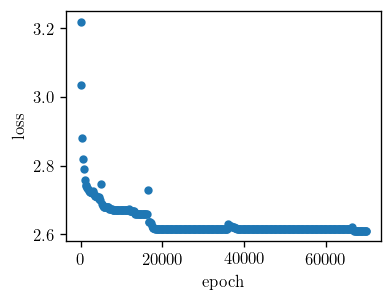

In [ ]:
from tqdm import tqdm
# train the model
def train_model(training_data, training_labels, test_data,test_labels, model):
  # define the optimization
  # criterion = torch.nn.MSELoss() # output layer size = 1
  # criterion = torch.nn.BCELoss() # output layer size = 25
  criterion = torch.nn.CrossEntropyLoss() # weighted costs 

  # def mean_power_err_loss(input, target, power=3):
  #   return torch.mean(torch.abs(input - target) ** power)
  # criterion = mean_power_err_loss

  # optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

  optimizer = torch.optim.Adam( model.parameters(), lr=1e-3, betas=(0.9, 0.999) )
  # Increase the number of epochs for your "final" run
  epochs, losses = [], []
  for epoch in tqdm(range(70_000)):

    # clear the gradient
    optimizer.zero_grad()
    # compute the model output
    myoutput = model(training_data.float())

    # calculate loss
    loss = criterion(myoutput, training_labels.float())

    # credit assignment
    loss.backward()
    # update model weights
    optimizer.step()

    if epoch%200 == 0:
      epochs.append(epoch)
      losses.append(loss.detach().numpy())

  # ADD PLOT
  fig, ax = plt.subplots(1,1, dpi=120)
  ax.scatter(epochs, losses)
  ax.set_ylabel('loss')
  ax.set_xlabel('epoch')
  print(losses[-1])
  return fig, ax, model


# convert ranks or contestants into probability array 
p_labels = torch.zeros( (len(labels),25), dtype=torch.long)
for i, rank in enumerate(labels):
  p_labels[i,rank-1] = 1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, 
                                                    p_labels, 
                                                    # np.reshape(labels, (len(labels),1)), 
                                                    test_size=0.33, train_size=0.67, random_state=12345 )

num_feat = X_train.numpy().shape[1]
model = MLP( input_size=num_feat, hidden_size=num_feat, n_hidden_layers=1 )
print(model)
fig, ax, model = train_model( X_train, y_train, X_test, y_test, model )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


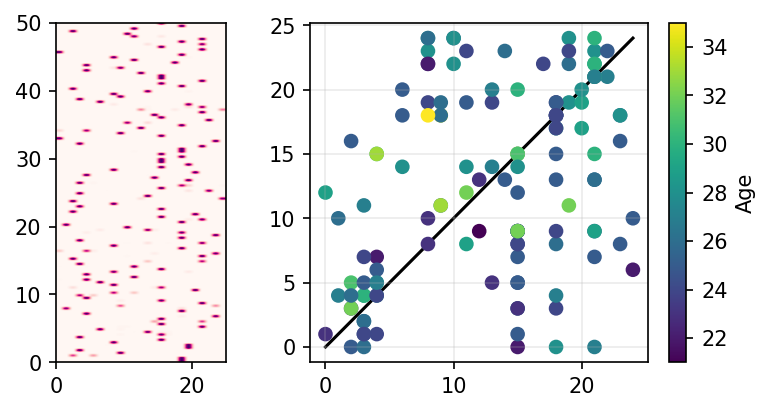

0.09841991341991342 0.04


In [ ]:
pred = model( X_test.float() ).detach().numpy()

# plt.scatter( y_train, np.argmax(pred, axis=1) )
# plt.scatter( np.argmax(y_test, axis=1), np.argmax(pred, axis=1) )
# plt.show()

fig, subs = plt.subplots(nrows=1,ncols=2, figsize=(6,3), gridspec_kw={'width_ratios': [1,2]},dpi=150)
subs[0].imshow( pred, aspect='equal', extent=(0,25, 0,50), cmap='RdPu')

ind=0

dat = subs[1].scatter( np.argmax(pred, axis=1), np.argmax(y_test, axis=1), c=X_test.numpy()[:,ind], label=input_names[ind] )
subs[1].plot( np.arange(0,25), np.arange(0,25), '-k', zorder=0 )
subs[1].grid(alpha=0.25)
fig.colorbar(dat, label=input_names[ind])
plt.show()


from sklearn.metrics import balanced_accuracy_score
score = balanced_accuracy_score( np.argmax(y_test, axis=1),  np.argmax(pred, axis=1) )
print( score, 1/25 )


In [ ]:
[f"{i},{val}" for i, val in enumerate(input_names)]

['0,Age',
 '1,Season ',
 '2,1-on-1 week',
 '3,FIR',
 '4,INTERNATIONAL',
 '5,NE',
 '6,NW',
 '7,SE',
 '8,SW',
 '9,Race_0',
 '10,Race_1',
 '11,Race_2',
 '12,Race_3',
 '13,Race_4',
 '14,CORPORATE',
 '15,OTHER',
 '16,POLITICS',
 '17,TRADES',
 '18,TRADITIONAL']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# arr = np.linspace(0, 50, 100).reshape((10, 10))
# fig, ax = plt.subplots(ncols=2)

# cmap = plt.get_cmap('jet')
# new_cmap = truncate_colormap(cmap, 0.2, 0.8)
# ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
# ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
# plt.show()


In [ ]:
# install latex for matplotlib
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended


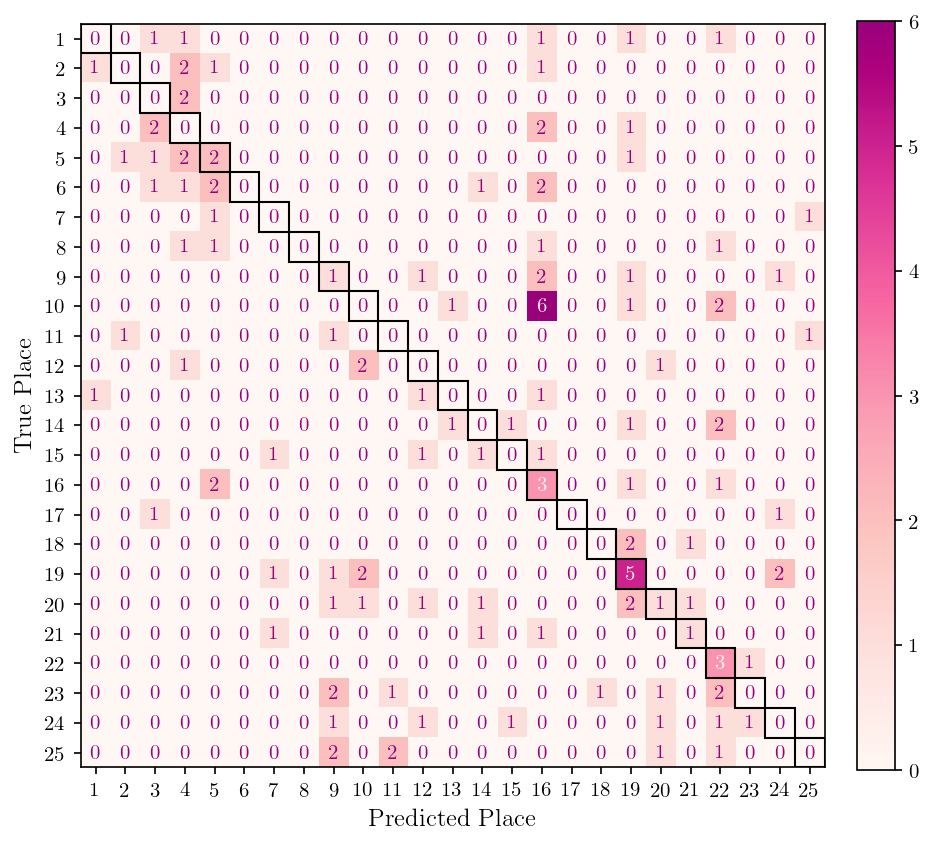

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.patches as patches

plt.style.use('drive/MyDrive/DSFP_data/mpl_style.txt')


cm = confusion_matrix( np.argmax(y_test, axis=1),  np.argmax(pred, axis=1) )

disp = ConfusionMatrixDisplay( confusion_matrix=cm, display_labels=[i for i in range(1,26)] )

fig, ax = plt.subplots( 1, 1, figsize=(7,7), dpi=150)

cmap = plt.get_cmap('RdPu')
custom_cmap = truncate_colormap(cmap, 0.0, 0.8)

disp.plot(ax = ax, cmap=custom_cmap, colorbar=False)

plt.colorbar( mappable=disp.im_, ax=ax, fraction=0.046, pad=0.04 )

for i in range(25):
  rect = patches.Rectangle( (i-.5, i-.5), 1, 1, linewidth=1, edgecolor='k', facecolor='none')
  # Add the patch to the Axes
  ax.add_patch(rect)

ax.set_xlabel( 'Predicted Place', fontsize=12,)
ax.set_ylabel( 'True Place', fontsize=12,)

# plt.savefig('drive/MyDrive/DSFP_data/NN_conf_matr.pdf')

plt.show()

In [ ]:
X_test.shape

torch.Size([132, 19])

In [ ]:
# Example of target with class indices
loss = torch.nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)

print(input, '\n', target)

output = loss(input, target)
output.backward()

# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)

output = loss(input, target)

output.backward()

tensor([[-1.0810,  1.3962,  2.5343,  0.5350,  0.6050],
        [ 0.9558,  0.3176,  0.7493, -1.8300,  0.4218],
        [-0.9194,  0.4368, -2.6578, -0.4051,  0.1625]], requires_grad=True) 
 tensor([3, 0, 1])


In [ ]:
np.unique( X_train[:,1].numpy() )

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25.])

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score( np.random.randint(low=1, high=25, size=600_000),  np.random.randint(low=1, high=25, size=600_000) )


0.041952290185935694

In [ ]:
1/25

0.04

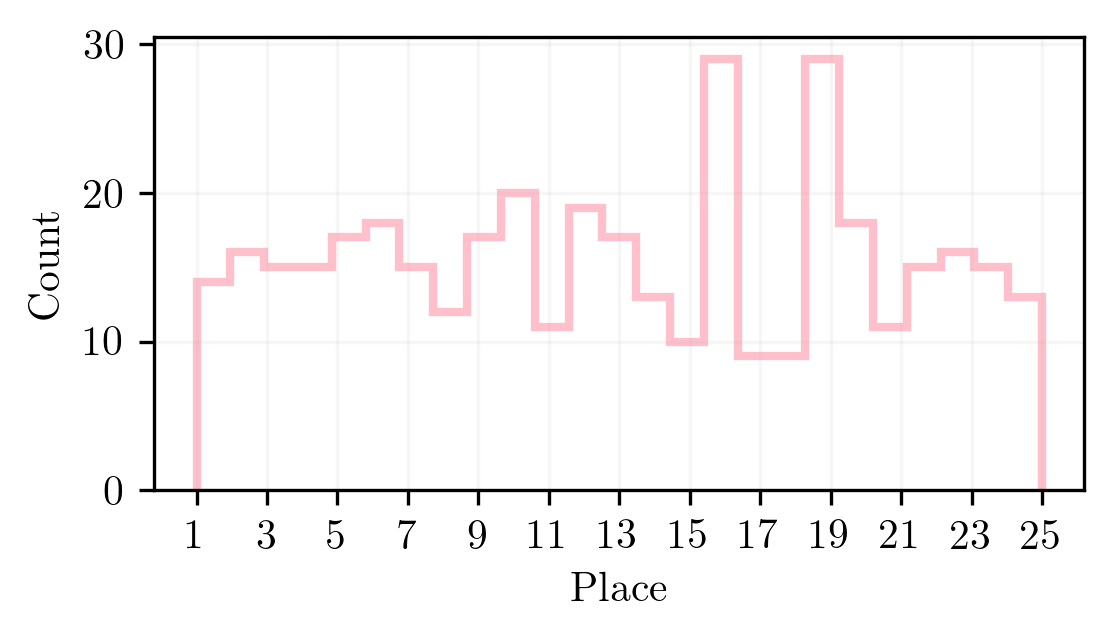

In [ ]:
plt.figure(figsize=(4,2))
plt.hist( combined_df.Place, bins=25, histtype='step', color='pink', linewidth=2 )
plt.grid(alpha=0.1)
plt.xticks( np.arange(1,26,2) )
plt.xlabel('Place')
plt.ylabel('Count')

# plt.savefig('drive/MyDrive/DSFP_data/NN_places_hist.pdf')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


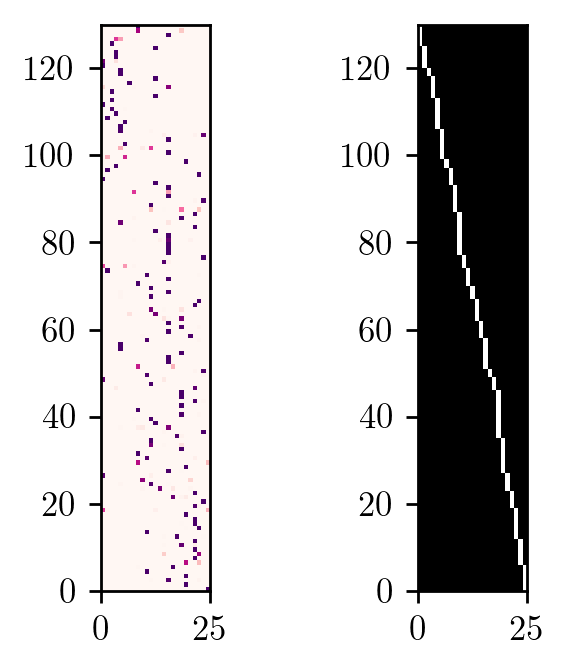

In [ ]:

pred = model( X_test.float() ).detach().numpy()

fig, subs = plt.subplots(nrows=1,ncols=2, figsize=(3,3),dpi=250)

locs = np.argsort( np.argmax(y_test.numpy(), axis=1) )

subs[0].imshow( pred[locs,:] , cmap='RdPu', extent=(0,25, 0,130) )
subs[1].imshow( y_test.numpy()[locs,:],  cmap='bone', extent=(0,25, 0,130) )
plt.show()

In [ ]:
pred.shape

(130, 25)